In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [26]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=4)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
y_pred=classifier.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]


In [33]:
from sklearn.metrics import *
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9125


In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[47  5]
 [ 2 26]]


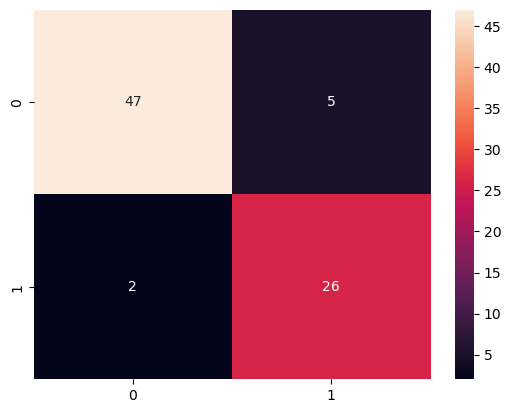

In [35]:
sns.heatmap(cm,annot=True)

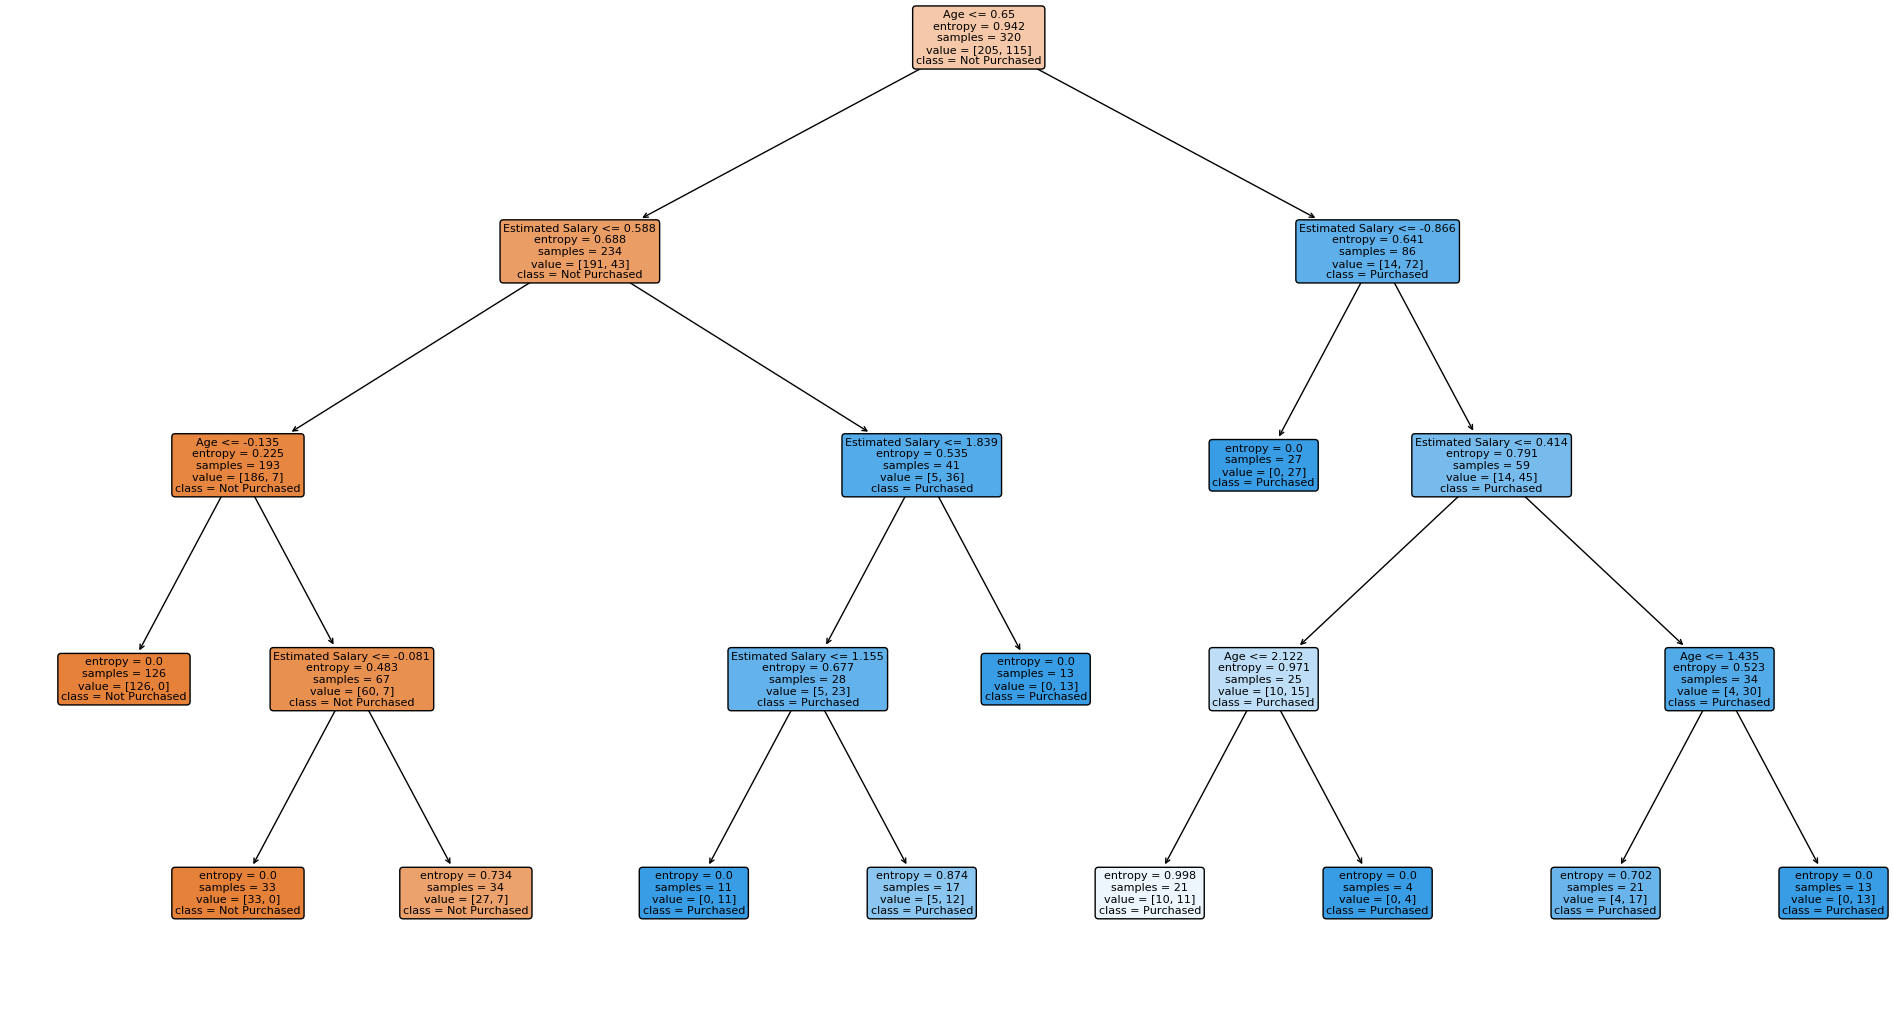

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(classifier,
          feature_names=["Age","Estimated Salary"],
          class_names=["Not Purchased","Purchased"],
          filled=True,
          rounded=True
          )
plt.show()